In [1]:
import numpy as np
import os
from PIL import Image
from numpy import asarray
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid

In [2]:
riceClasses = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag'] # mapped to their respective indexes (0,1,2,3,4) in ouput Y array
X = np.zeros(shape=(75000, 625))
y = np.zeros(shape=(75000, 1))

In [3]:
def addImagesInFolderToData(folderPath, classIndex, count):
    filenames = os.listdir(folderPath)
    # print(filenames)
    for idx, imageName in enumerate(filenames):
        if riceClasses[classIndex] in imageName or riceClasses[classIndex].lower() in imageName:
            img = Image.open(folderPath + '/' + imageName).resize((25, 25)).convert('L') # converts image to grayscale
            imgArray = asarray(img).reshape(-1) # flattens img to 1d vector
            X[count] = imgArray
            y[count, 0] = classIndex
            count += 1
    return count


In [4]:
def getDataForEachRiceType():
    count = 0
    for idx, riceType in enumerate(riceClasses):
        print('Getting data for rice type: ' +  riceType)
        count = addImagesInFolderToData('./Rice_Image_Dataset/' + riceType, idx, count)
        print('Got data for rice type: ' +  riceType)
        print(f'Count after {riceType}: {count}')
    print(f'totalCount: {count}')
        

In [5]:
getDataForEachRiceType()

Getting data for rice type: Arborio
Got data for rice type: Arborio
Count after Arborio: 15000
Getting data for rice type: Basmati
Got data for rice type: Basmati
Count after Basmati: 30000
Getting data for rice type: Ipsala
Got data for rice type: Ipsala
Count after Ipsala: 45000
Getting data for rice type: Jasmine
Got data for rice type: Jasmine
Count after Jasmine: 60000
Getting data for rice type: Karacadag
Got data for rice type: Karacadag
Count after Karacadag: 75000
totalCount: 75000


In [6]:
print('The first element of X is: ', X[0])

The first element of X is:  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   1.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   2.   2.   1.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   2.   2.   2.   1.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   2.   2.   2.   2.   2.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   2.
   2.   2.   2.   2.   2.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   2.   2.   2.   2.
   2.   2.   1.   0.  10.  85. 119.  90.  21.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   2.   2.   2.   2.   2.   2.   1.
   0.  99. 188. 182. 184. 154.  42.   0.   0.   0

In [7]:
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The first element of y is:  0.0
The last element of y is:  4.0


In [8]:



# using the train test split function 
X_train, X_test, y_train, y_test = train_test_split(X,y ,random_state=104, test_size=0.25, shuffle=True) 

print(f'X train shape: {X_train.shape}')
print(f'Y train shape: {y_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'Y test shape: {y_test.shape}')

X train shape: (56250, 625)
Y train shape: (56250, 1)
X test shape: (18750, 625)
Y test shape: (18750, 1)


Function For Visualizing Data:

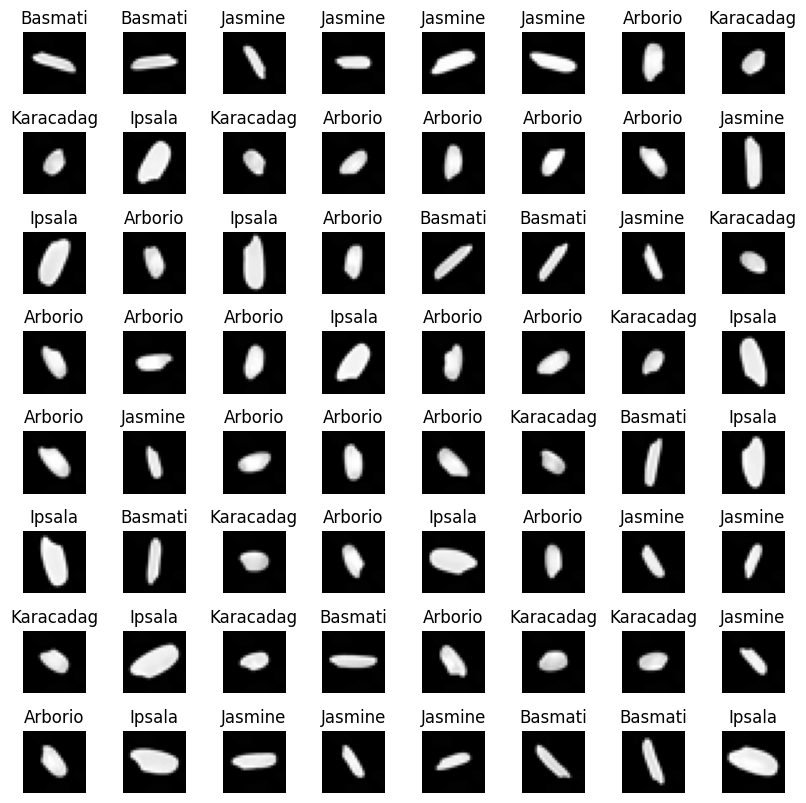

In [9]:

# You do not need to modify anything in this cell

m, n = X_train.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_train[random_index].reshape((25,25)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(riceClasses[int(y_train[random_index,0])])
    ax.set_axis_off()

Create TensorFlow Model

In [67]:
tf.random.set_seed(1234)
model = Sequential(
    [
        tf.keras.Input(shape=(625,)),
        Dense(units=25, activation='relu'),
        Dense(units=15, activation='relu'),
        Dense(units=5, activation='linear')
    ], name = "Rice_Model"
)

In [68]:
model.summary()

Model: "Rice_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 25)             │        15,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 5)              │            80 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,120 (62.97 KB)

 Trainable params: 16,120 (62.97 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
[layer1, layer2, layer3] = model.layers

In [70]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (625, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 5), b3 shape = (5,)


In [71]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
)

history = model.fit(
    X_train,y_train,
    epochs=40
)

Epoch 1/40
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 1s 276us/step - loss: 9.2531
Epoch 2/40
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - loss: 0.5034
Epoch 3/40
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - loss: 0.2882
Epoch 4/40
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - loss: 0.2186
Epoch 5/40
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - loss: 0.1863
Epoch 6/40
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - loss: 0.1644
Epoch 7/40
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - loss: 0.1486
Epoch 8/40
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - loss: 0.1382
Epoch 9/40
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - loss: 0.1258
Epoch 10/40
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - loss: 0.1175
Epoch 11/40
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step - loss: 0.1140
Epoch 12/40
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - loss: 0.1078
Epoch 13/40
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step - loss: 0.1071
Epoch 14/40
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - loss: 0.1000
E

In [107]:
def checkModelAccuracy():
    correct = 0
    total = 2000
    for idx, tstImgData in enumerate(X_test):
        if idx >= 2000:
            break
        predictionVector = model.predict(tstImgData.reshape(1, 625))
        prediction = np.argmax(predictionVector)
        if prediction == y_test[idx, 0]:
            correct += 1
            print(f' Run {idx} Correct :)')
        else:
            print(f'Run {idx} Incorrect :(')
    return correct / total
        

In [ ]:
accuracy = checkModelAccuracy()
print(f'Accuracy: {accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
 Run 0 Correct :)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
 Run 1 Correct :)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
 Run 2 Correct :)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
 Run 3 Correct :)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
 Run 4 Correct :)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
 Run 5 Correct :)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
 Run 6 Correct :)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
 Run 7 Correct :)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
 Run 8 Correct :)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
 Run 9 Correct :)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
 Run 10 Correct :)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
 Run 11 Correct :)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
 Run 12 Correct :)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
 Run 13 Correct :)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
 Run 14 Correct :)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
 Run 15 Correct :)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
 Run 16 Correct :)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
 Run 17 Correct :)
1/